# **Carga y revision de datos**

In [ ]:
import pandas as pd 

# Cargar el dataset (ajusta el nombre del archivo si es necesario)
df = pd.read_csv("airline_passenger_satisfaction.csv")  

# Mostrar las primeras filas  
print(df.head())  

# Ver la estructura del dataset
print(df.info())

# Resumen estadístico
print(df.describe())


   Unnamed: 0  Gender      customer_type  age   type_of_travel customer_class  \
0           0    Male     Loyal Customer   13  Personal Travel       Eco Plus   
1           1    Male  disloyal Customer   25  Business travel       Business   
2           2  Female     Loyal Customer   26  Business travel       Business   
3           3  Female     Loyal Customer   25  Business travel       Business   
4           4    Male     Loyal Customer   61  Business travel       Business   

   flight_distance  inflight_wifi_service  departure_arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   ease_of_online_booking  ...  

# **Limpieza de Datos**

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64
Val

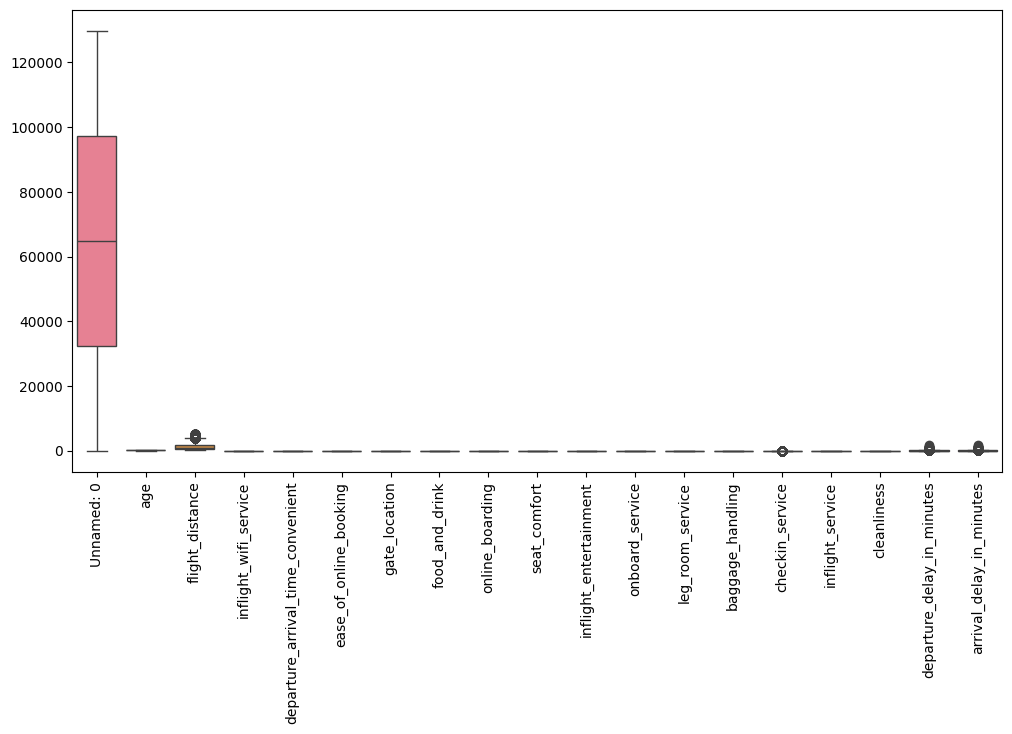

In [16]:
# Verificar valores nulos
print(df.isnull().sum())

# Verificar valores únicos en columnas categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"Valores únicos en {col}: {df[col].unique()}")

# Detectar valores atípicos en columnas numéricas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()


In [22]:
# Rellenar valores nulos de arrival_delay_in_minutes con la mediana
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median(), inplace=True)

# Estandarizar la columna customer_type
df['customer_type'] = df['customer_type'].str.replace('disloyal Customer', 'Disloyal Customer')

# Verificar que los cambios se hayan aplicado
print(df['arrival_delay_in_minutes'].isnull().sum())  # Debe ser 0
print(df['customer_type'].unique())  # Debe mostrar 'Loyal Customer' y 'Disloyal Customer'


0
['Loyal Customer' 'Disloyal Customer']


C:\Users\migue\AppData\Local\Temp\ipykernel_14852\715689119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median(), inplace=True)


# **Análisis y Visualización de Datos**

**¿Cuál es la distribución de satisfacción de los clientes?**

C:\Users\migue\AppData\Local\Temp\ipykernel_14852\3076509932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df, palette='viridis')


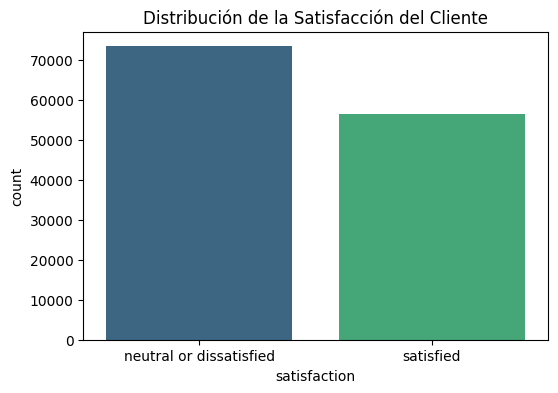

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='satisfaction', data=df, palette='viridis')
plt.title('Distribución de la Satisfacción del Cliente')
plt.show()


**¿Cómo influye el tipo de cliente en la satisfacción?**

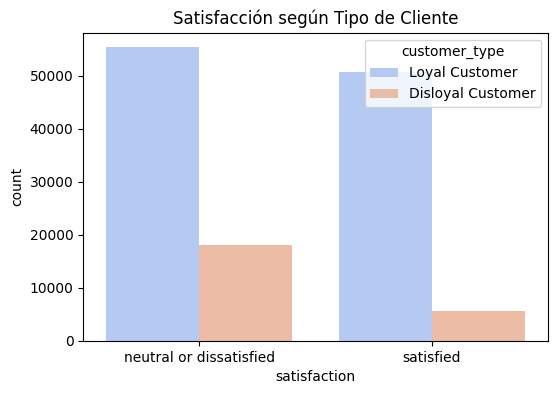

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='satisfaction', hue='customer_type', data=df, palette='coolwarm')
plt.title('Satisfacción según Tipo de Cliente')
plt.show()


 **¿Cuál es la relación entre la clase del pasajero y su satisfacción?**

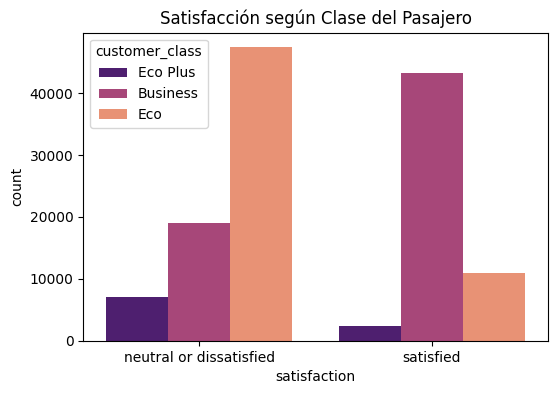

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='satisfaction', hue='customer_class', data=df, palette='magma')
plt.title('Satisfacción según Clase del Pasajero')
plt.show()


# **Exploración de Factores Clave**

C:\Users\migue\AppData\Local\Temp\ipykernel_14852\3934064370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='arrival_delay_in_minutes', data=df, palette='coolwarm')


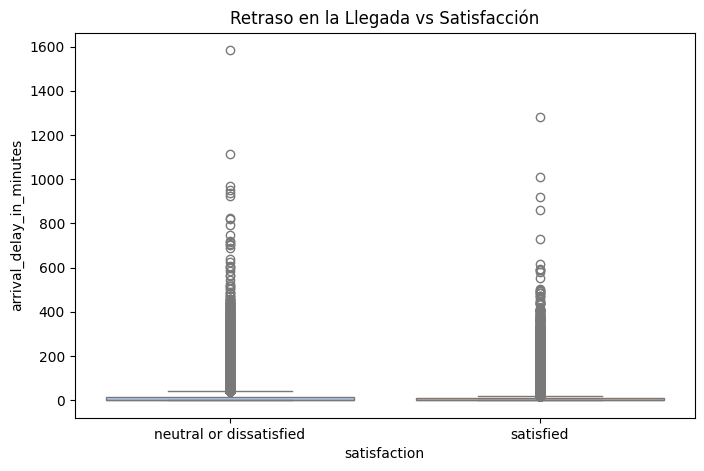

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='satisfaction', y='arrival_delay_in_minutes', data=df, palette='coolwarm')
plt.title('Retraso en la Llegada vs Satisfacción')
plt.show()


¿Cuáles son los servicios peor evaluados?

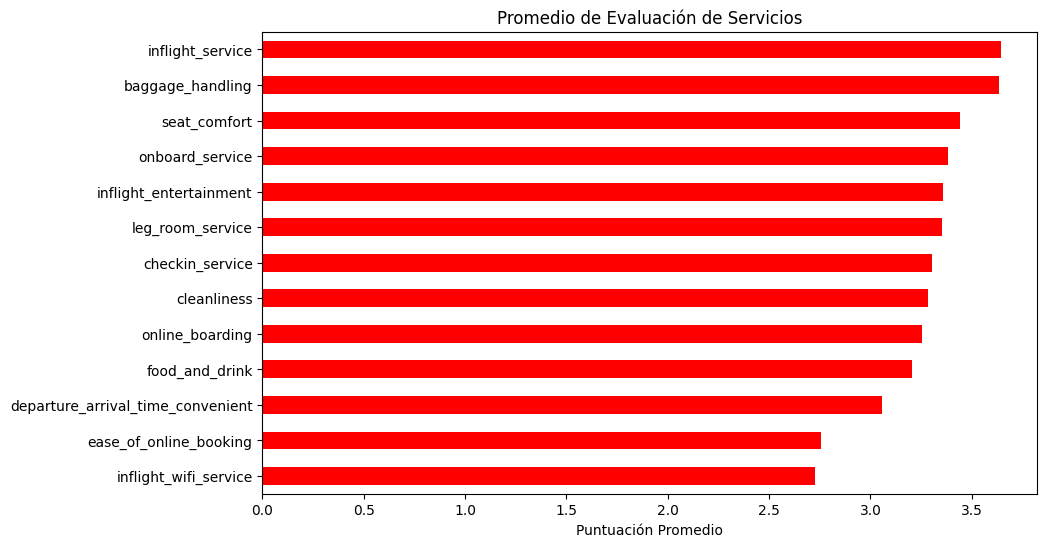

In [28]:
servicios = [
    'inflight_wifi_service', 'departure_arrival_time_convenient', 
    'ease_of_online_booking', 'food_and_drink', 'online_boarding', 
    'seat_comfort', 'inflight_entertainment', 'onboard_service', 
    'leg_room_service', 'baggage_handling', 'checkin_service', 
    'inflight_service', 'cleanliness'
]

plt.figure(figsize=(10,6))
df[servicios].mean().sort_values().plot(kind='barh', color='red')
plt.title('Promedio de Evaluación de Servicios')
plt.xlabel('Puntuación Promedio')
plt.show()


¿Cómo varía la satisfacción según la edad?

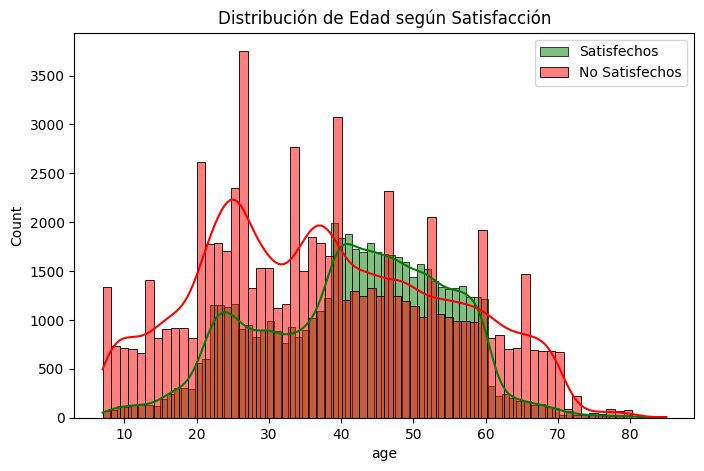

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['satisfaction']=='satisfied']['age'], kde=True, label='Satisfechos', color='green')
sns.histplot(df[df['satisfaction']=='neutral or dissatisfied']['age'], kde=True, label='No Satisfechos', color='red')
plt.legend()
plt.title('Distribución de Edad según Satisfacción')
plt.show()
